In [2]:
# 10/1/2016, Ravi Rao
# Script to check the number of distinct practitioners by specialty, hospitals etc.


In [40]:
import numpy as np
import pandas as pd
from sklearn import *
from scipy.stats import *
from framework.data import *
from framework.draw import *
from matplotlib import pyplot as plt

In [ ]:
# First find the total number of rows in the "practitioners" database


In [3]:
# Select distinct pairs of (NPI, Primary specialty) from the database
data = pd.read_sql('''
select distinct
  `NPI`, 
  `Primary specialty`
from practitioners
''', sql)

In [4]:
# The following gives the number of unique practitioners in the database
data.shape

(895431, 2)

In [6]:
# Find out the number of "Internal Medicine" practitioners
# Select distinct pairs of (NPI, Primary specialty) from the database
data_Internal_Med = pd.read_sql('''
select distinct
  `NPI`, 
  `Primary specialty`
from practitioners
where `Primary specialty` in ('Internal Medicine')
''', sql)

In [7]:
data_Internal_Med.shape

(96975, 2)

In [12]:
# Try the same analysis on the Pandas dataframe:
#http://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-in-a-group-in-pandas-group-by-object

data.groupby(['Primary specialty']).size()

Primary specialty
ADDICTION MEDICINE                                     165
ALLERGY/IMMUNOLOGY                                    3466
ANESTHESIOLOGY                                       35667
ANESTHESIOLOGY ASSISTANT                              1429
AUDIOLOGIST                                           6288
CARDIAC ELECTROPHYSIOLOGY                             1537
CARDIAC SURGERY                                       1575
CARDIOVASCULAR DISEASE (CARDIOLOGY)                  22907
CERTIFIED NURSE MIDWIFE                               2571
CERTIFIED REGISTERED NURSE ANESTHETIST               36041
CHIROPRACTIC                                         41985
CLINICAL NURSE SPECIALIST                             2251
CLINICAL PSYCHOLOGIST                                25385
CLINICAL SOCIAL WORKER                               32993
COLORECTAL SURGERY (PROCTOLOGY)                       1342
CRITICAL CARE (INTENSIVISTS)                          2922
DERMATOLOGY                           

In [13]:
# Try the same analysis on the Pandas dataframe:
print(data.groupby(['Primary specialty']).size())

Primary specialty
ADDICTION MEDICINE                                     165
ALLERGY/IMMUNOLOGY                                    3466
ANESTHESIOLOGY                                       35667
ANESTHESIOLOGY ASSISTANT                              1429
AUDIOLOGIST                                           6288
CARDIAC ELECTROPHYSIOLOGY                             1537
CARDIAC SURGERY                                       1575
CARDIOVASCULAR DISEASE (CARDIOLOGY)                  22907
CERTIFIED NURSE MIDWIFE                               2571
CERTIFIED REGISTERED NURSE ANESTHETIST               36041
CHIROPRACTIC                                         41985
CLINICAL NURSE SPECIALIST                             2251
CLINICAL PSYCHOLOGIST                                25385
CLINICAL SOCIAL WORKER                               32993
COLORECTAL SURGERY (PROCTOLOGY)                       1342
CRITICAL CARE (INTENSIVISTS)                          2922
DERMATOLOGY                           

In [14]:
# Note: the above does not show all the values ...
df2 = pd.DataFrame(data.groupby(['Primary specialty']).size())

In [18]:
# Note: the above does not print the entire dataframe
# http://stackoverflow.com/questions/19124601/is-there-a-way-to-pretty-print-the-entire-pandas-series-dataframe
pd.set_option('display.max_rows', 100)

In [19]:
df2

,0
Primary specialty,
ADDICTION MEDICINE,165
ALLERGY/IMMUNOLOGY,3466
ANESTHESIOLOGY,35667
ANESTHESIOLOGY ASSISTANT,1429
AUDIOLOGIST,6288
CARDIAC ELECTROPHYSIOLOGY,1537
CARDIAC SURGERY,1575
CARDIOVASCULAR DISEASE (CARDIOLOGY),22907
CERTIFIED NURSE MIDWIFE,2571


In [ ]:
# So the number 96,975 for "Internal Medicine" in the SQL query matches what Pandas finds.
# This is just a consistency check.

In [21]:
# Now create a barchart/piecharts

In [23]:
print(data.groupby(['Primary specialty']).count())

                                                     NPI
Primary specialty                                       
ADDICTION MEDICINE                                   165
ALLERGY/IMMUNOLOGY                                  3466
ANESTHESIOLOGY                                     35667
ANESTHESIOLOGY ASSISTANT                            1429
AUDIOLOGIST                                         6288
CARDIAC ELECTROPHYSIOLOGY                           1537
CARDIAC SURGERY                                     1575
CARDIOVASCULAR DISEASE (CARDIOLOGY)                22907
CERTIFIED NURSE MIDWIFE                             2571
CERTIFIED REGISTERED NURSE ANESTHETIST             36041
CHIROPRACTIC                                       41985
CLINICAL NURSE SPECIALIST                           2251
CLINICAL PSYCHOLOGIST                              25385
CLINICAL SOCIAL WORKER                             32993
COLORECTAL SURGERY (PROCTOLOGY)                     1342
CRITICAL CARE (INTENSIVISTS)   

In [27]:
c = data.groupby(['Primary specialty']).count()['NPI']


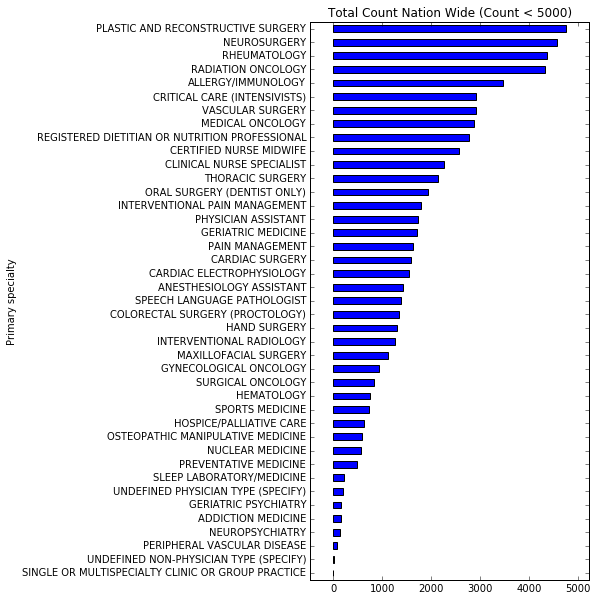

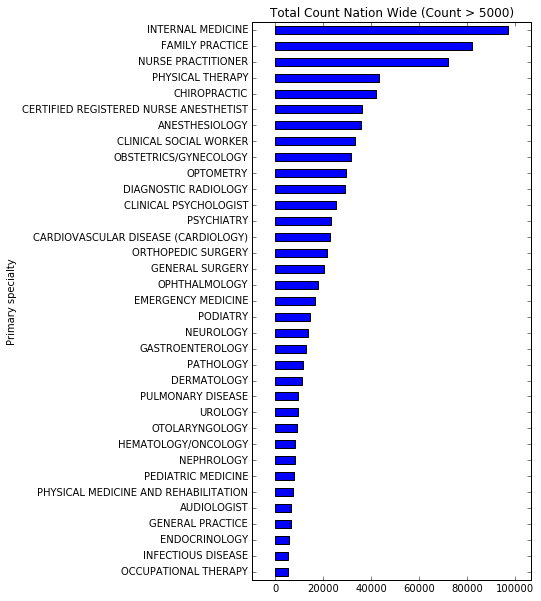

41 35


In [29]:
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count < 5000)')
c[c<5000].sort_values(ascending=True).plot.barh()
draw(save='total_count_lt_5000_v2.png', show=True)
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count > 5000)')
c[c>5000].sort_values(ascending=True).plot.barh()
draw(save='total_count_gt_5000_v2.png', show=True)
print(len(c[c<5000]), len(c[c>5000]))


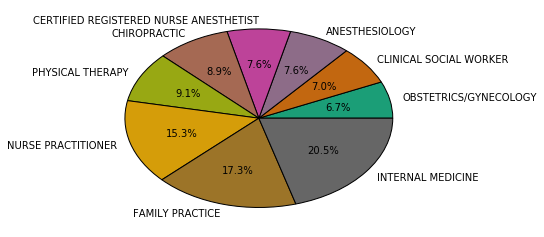

In [32]:
d = data.groupby(['Primary specialty']).count()['NPI'].sort_values()
ax = d[(d - d.mean()) / d.std() > 1].plot.pie(autopct='%1.1f%%', colormap='Dark2')
ax.set_ylabel('')
ax.set_title('')
plt.show()


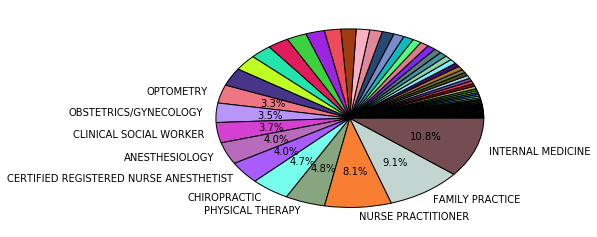

In [45]:
from matplotlib.pyplot import *

np.random.seed(2016)
cmap = matplotlib.colors.ListedColormap(np.random.rand(256, 3))
plt.clf()
i = iter(reversed(range(len(d.index))))
def func(pct):
    global i
    if next(i) <= 9:
        return '%1.1f%%' % (pct)
    else:
        return ''
ax = d.plot(kind='pie', colormap=cmap,
            autopct=func,
            labels=[l if i > len(d.index)-11 else '' for i, l in enumerate(d.index)])
ax.set_ylabel('')

# draw(show=True, save='specialty_pie_chart_v2.png', dpi=300)

plt.savefig('specialty_pie_chart_v2.png', bbox_inches='tight', dpi=300)
plt.show()


In [48]:
d = data.groupby(['Primary specialty']).count()['NPI'].sort_values(ascending=False)
print(d)

Primary specialty
INTERNAL MEDICINE                                    96975
FAMILY PRACTICE                                      81901
NURSE PRACTITIONER                                   72090
PHYSICAL THERAPY                                     43107
CHIROPRACTIC                                         41985
CERTIFIED REGISTERED NURSE ANESTHETIST               36041
ANESTHESIOLOGY                                       35667
CLINICAL SOCIAL WORKER                               32993
OBSTETRICS/GYNECOLOGY                                31399
OPTOMETRY                                            29571
DIAGNOSTIC RADIOLOGY                                 28941
CLINICAL PSYCHOLOGIST                                25385
PSYCHIATRY                                           23331
CARDIOVASCULAR DISEASE (CARDIOLOGY)                  22907
ORTHOPEDIC SURGERY                                   21613
GENERAL SURGERY                                      20206
OPHTHALMOLOGY                         